In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Gabor Filter Demo

In this demo, we will create Gabor filters and apply them to face images.

Note that the latest version of `skimage` has `skimage.filters.gabor_filter` to do this in one line!

In [2]:
from numpy import *
from IPython.html.widgets import *
import matplotlib.pyplot as plt
from IPython.core.display import clear_output

:0: FutureWarning: IPython widgets are experimental and may change in the future.


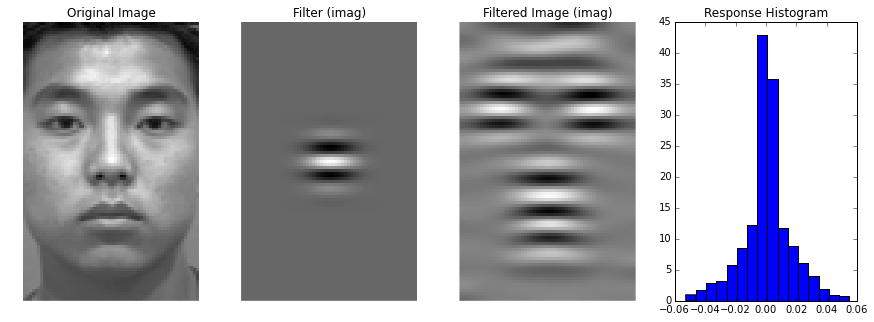

In [3]:
#from skimage.filters import gabor_kernel
from filters import gabor_filter
import pickle
dataset=pickle.load(open('cafe.pkl','r')) # or 'pofa.pkl' for POFA

def plot_filter_result(n, frequency, theta, real_or_imag=0):
    """Plots the results of the real part of the Gabor filter."""
    original=dataset.images[n]
    fig, axs = plt.subplots(1, 4, figsize=(15,5))
    axs[0].imshow(original,cmap='gray',interpolation='none')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    ri = 'real' if real_or_imag else 'imag'
    delta_image=zeros(original.shape, dtype=float)
    delta_image[tuple(array(delta_image.shape)/2)]=1.0 # 1.0 at the center
    kernel_real=gabor_filter(delta_image, frequency=frequency, theta=theta)[real_or_imag]
    axs[1].imshow(kernel_real,cmap='gray',interpolation='none')
    axs[1].set_title('Filter (%s)' % ri)
    axs[1].axis('off')
    
    
    filtered_real=gabor_filter(original, frequency=frequency, theta=theta)[real_or_imag]
    axs[2].imshow(filtered_real,cmap='gray',interpolation='none')
    axs[2].set_title('Filtered Image (%s)' % ri)
    axs[2].axis('off')
    
    axs[3].hist(filtered_real.flatten(), normed=True, bins=16)
    axs[3].set_title('Response Histogram')

interactive(plot_filter_result, n=(0,dataset.images.shape[0]-1),
            frequency=FloatSlider(min=0.001, max=0.5, value=0.1),
            theta=FloatSlider(min=0, max=pi, value=pi / 2.0),
            real_or_imag=RadioButtons(options={'Real': 0, 'Imag': 1}))